# Abstract
- This notebook is designed as an interactive interface for others to explore the lyrics data through a rough word search
- The funtion quick_look_up takes in a list of words and plot title and draws a line chart of the word frequency across time
- word frequency is defined as: the number of top 100 songs which a word has appeared, regardless of how many times that word appeared in the song

## Structure
- data preprocessing
- defining functions
- example queries
- empty cells for user input
- takeaway

In [1]:
import pandas as pd
import string
import nltk
import collections
import re

In [2]:
lyrics_df = pd.read_csv("../data/cleaned_lyrics.csv")
lyrics_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,no.,year,song,artist(s),song_wiki_url,artist_wiki_url,lyrics
0,0,0,0,1,1958,"""Volare""",Domenico Modugno,['https://en.wikipedia.org/wiki/Volare_(song)'],['https://en.wikipedia.org/wiki/Domenico_Modug...,Penso che un sogno cosi` non ritorni mai piu` ...
1,1,1,1,2,1958,"""All I Have to Do Is Dream""",The Everly Brothers,['https://en.wikipedia.org/wiki/All_I_Have_to_...,['https://en.wikipedia.org/wiki/The_Everly_Bro...,Dream dream dream dream Dream dream drea...
2,2,2,2,3,1958,"""Don't""",Elvis Presley,['https://en.wikipedia.org/wiki/Don%27t_(Elvis...,['https://en.wikipedia.org/wiki/Elvis_Presley'],Don't don't that's what you say Each time t...
3,3,3,3,4,1958,"""Witch Doctor""",David Seville,['https://en.wikipedia.org/wiki/Witch_Doctor_(...,['https://en.wikipedia.org/wiki/Ross_Bagdasari...,{Movie version - DJ: Yeah! In the place to be!...
4,4,4,4,5,1958,"""Patricia""",Perez Prado,['https://en.wikipedia.org/wiki/Patricia_(Pere...,['https://en.wikipedia.org/wiki/Perez_Prado'],Kiss her and your lips will always want Patric...
...,...,...,...,...,...,...,...,...,...,...
6266,6346,6346,6346,96,2021,"""Things a Man Oughta Know""",Lainey Wilson,['https://en.wikipedia.org/wiki/Things_a_Man_O...,['https://en.wikipedia.org/wiki/Lainey_Wilson'],I can hook a trailer on a two-inch hitch I ca...
6267,6347,6347,6347,97,2021,"""Throat Baby""",BRS Kash,['https://en.wikipedia.org/wiki/Throat_Baby_(G...,['https://en.wikipedia.org/wiki/BRS_Kash'],What's happenin' Chi Chi? Sexy lil' bitc...
6268,6348,6348,6348,98,2021,"""Tombstone""",Rod Wave,['https://en.wikipedia.org/wiki/Tombstone_(son...,['https://en.wikipedia.org/wiki/Rod_Wave'],Damn this motherfucker too crazy Saucii Let...
6269,6349,6349,6349,99,2021,"""Drinkin' Beer. Talkin' God. Amen.""",Chase Rice,['https://en.wikipedia.org/wiki/Drinkin%27_Bee...,"['https://en.wikipedia.org/wiki/Chase_Rice', '...","Firewood crackle in the fall air ""Red Dirt"" p..."


In [3]:
import matplotlib.pyplot as plt

In [4]:
lyrics_df['tokens'] = lyrics_df['lyrics'].apply(lambda x: x.lower().split())

- to get word counts instead of song counts, uncomment the code in the following function
    - word counts is defined as : the number of times a word appear in the lyrics of top 100 songs, counting multiple occurrences of the word in the same song

In [5]:
def count_words(df, word):
    '''count number of words in each year'''
    year = {}
    total_tokens = {}
    for i in df.index:
        if df.loc[i,'year'] not in year:
            year[df.loc[i, 'year']] = 0
            total_tokens[df.loc[i, 'year']] = 0
#         year[df.loc[i, 'year']] += df.loc[i, 'tokens'].count(word)
        if word in df.loc[i, 'tokens']:
            year[df.loc[i, 'year']] += 1
        total_tokens[df.loc[i, 'year']] += len(df.loc[i, 'tokens'])
#     for key in year:
#         year[key] = year[key] / total_tokens[key]
    return year

In [6]:
def plot_words(word_dict, word):
    '''Plotting the chart'''
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.plot(word_dict.keys(), word_dict.values(), label = word)
    plt.xlabel('year', fontsize=20)
    plt.ylabel('frequency', fontsize=20)
    plt.title(f'Frequency of {word}', fontsize=30)
    plt.legend(prop={'size': 30})
    return

In [7]:
def quick_look_up(df, word_lst, title):
    '''quick search and plotting for presentation purposes'''
    for word in word_lst:
        plot_words(count_words(df, word), word)
    plt.title(title, fontsize=40)
    return

# Enter Queries Here

In [ ]:
quick_look_up(lyrics_df, ['', '', ''], '')

In [ ]:
quick_look_up(lyrics_df, ['', '', ''], '')

In [ ]:
quick_look_up(lyrics_df, ['', '', ''], '')

## Examples:

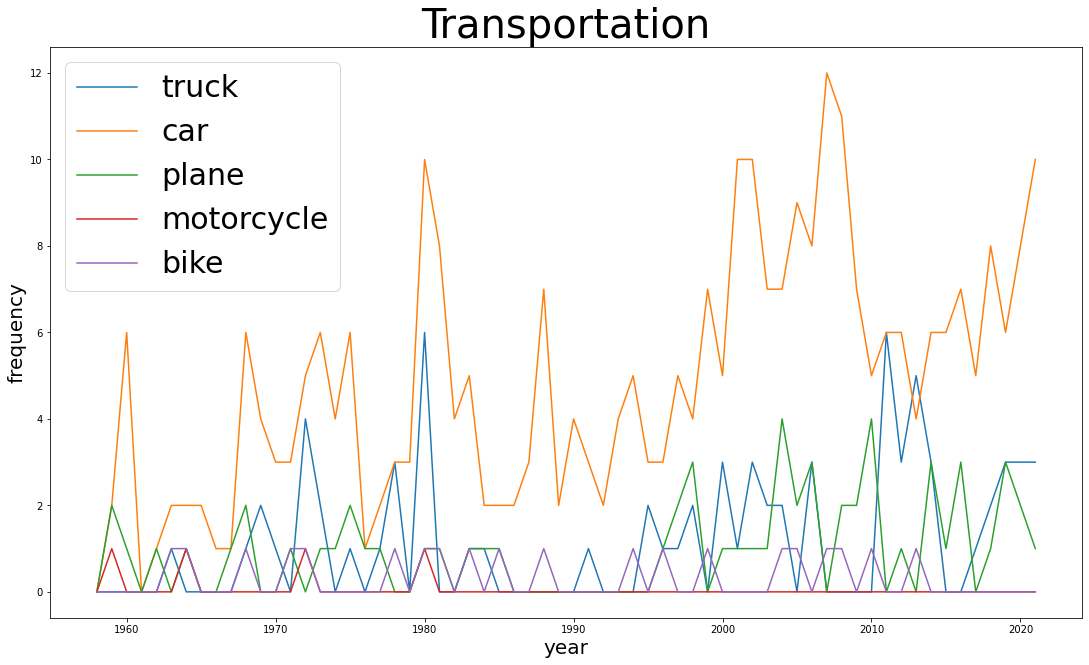

In [8]:
# enter word list and title

quick_look_up(lyrics_df, ['truck', 'car', 'plane', 'motorcycle', 'bike'], 'Transportation')

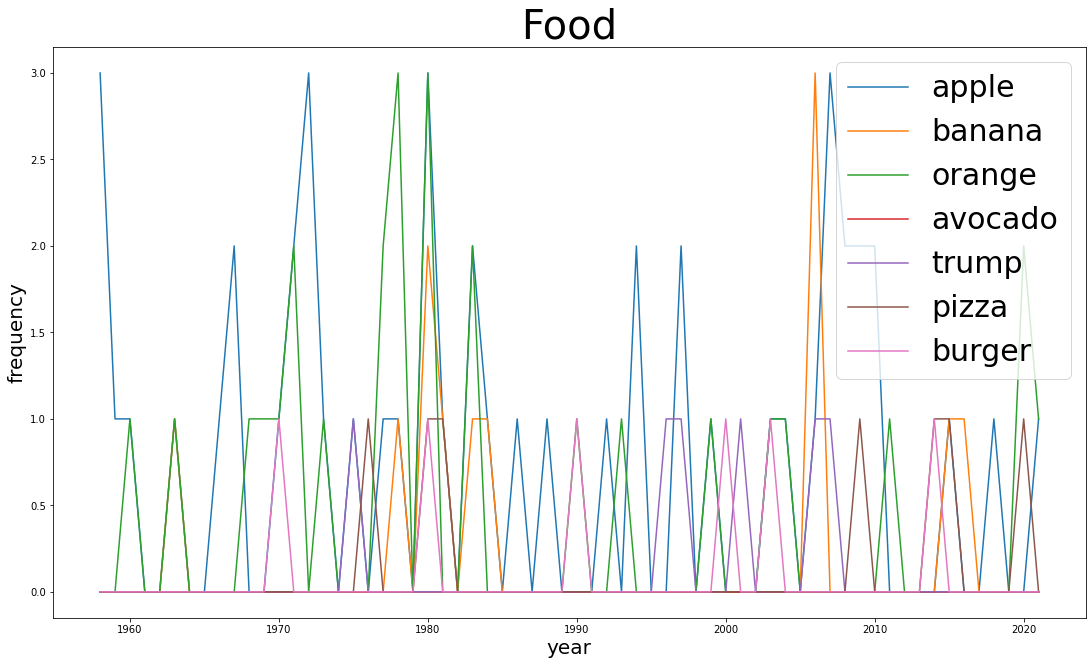

In [9]:
# enter word list and title

quick_look_up(lyrics_df, ['apple', 'banana', 'orange', 'avocado', 'trump', 'pizza', 'burger'], 'Food')

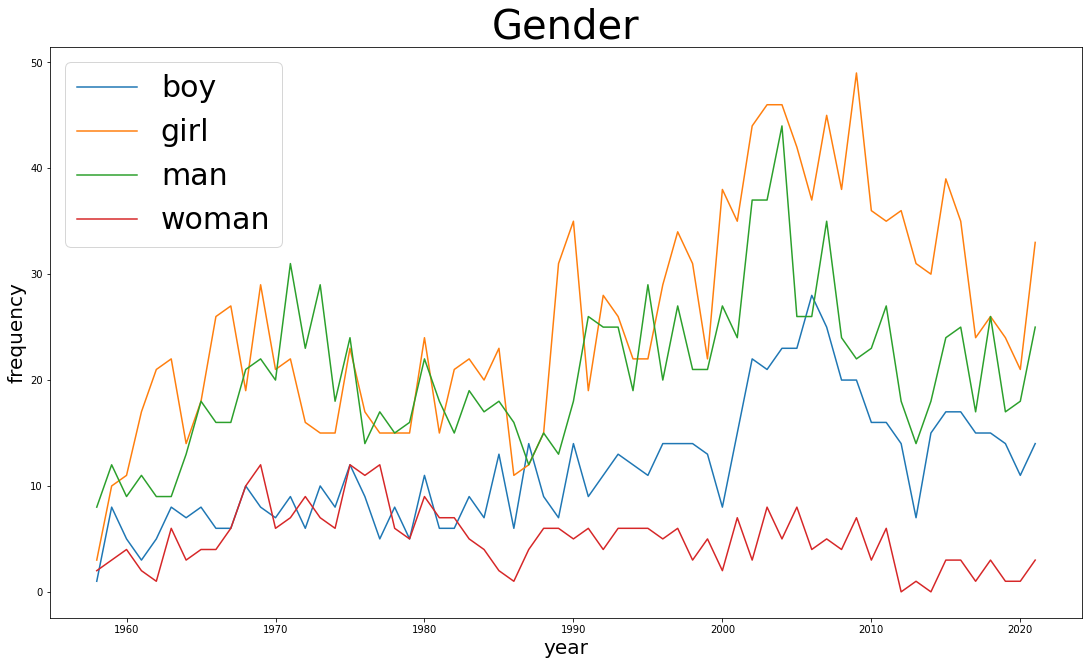

In [10]:
quick_look_up(lyrics_df, ['boy', 'girl', 'man', 'woman'], 'Gender');


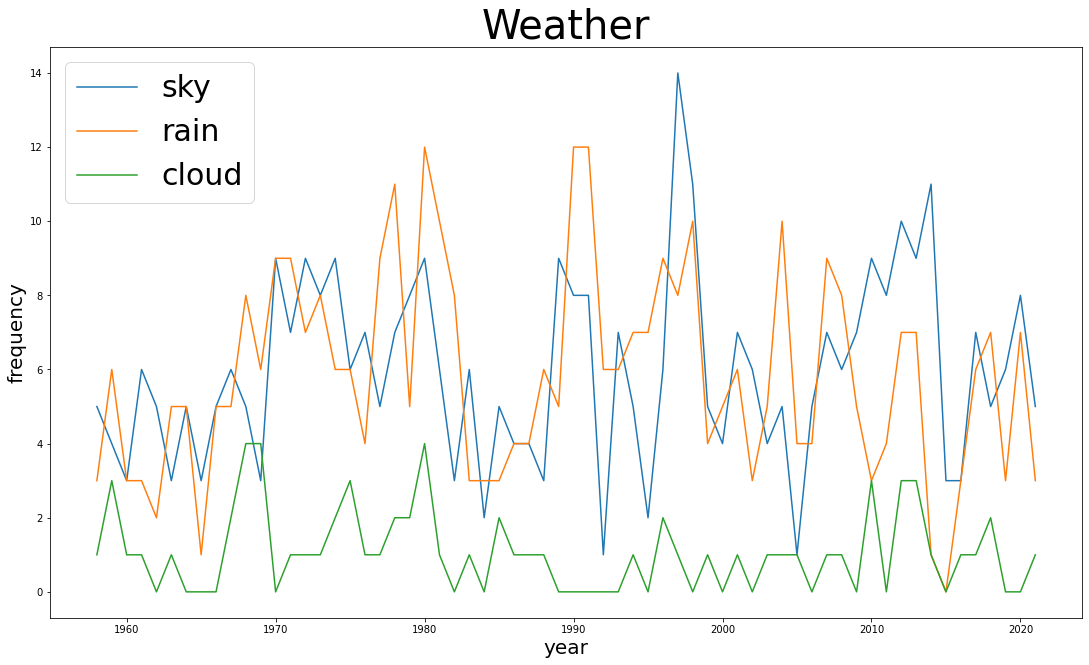

In [11]:
quick_look_up(lyrics_df, ['sky', 'rain', 'cloud'], 'Weather');


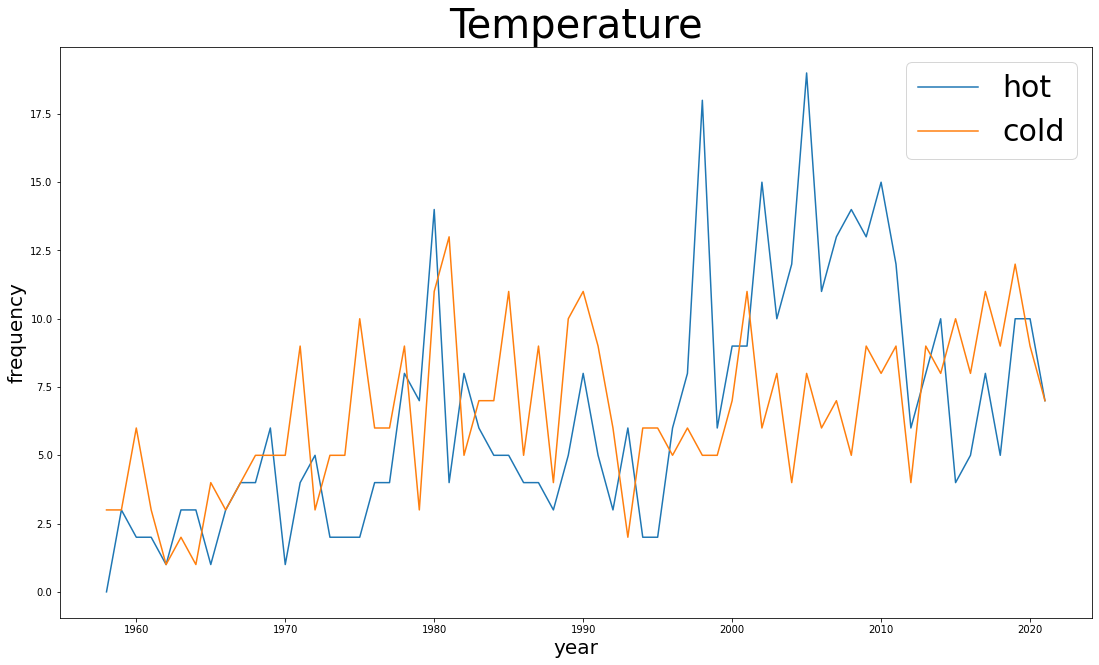

In [12]:
quick_look_up(lyrics_df, ['hot', 'cold'], 'Temperature');

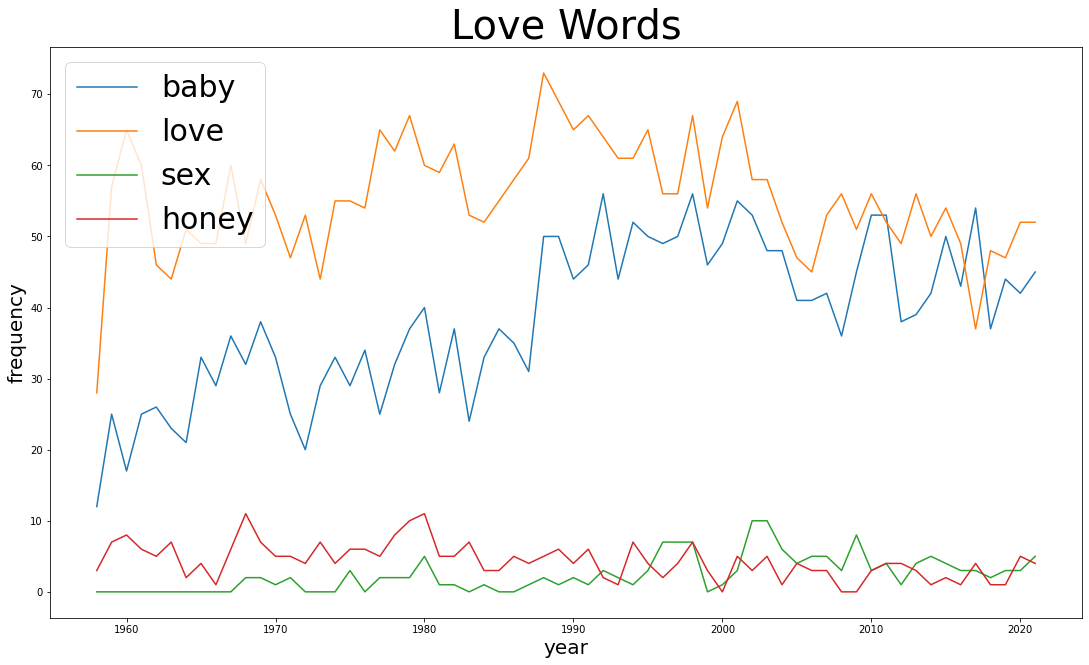

In [14]:
quick_look_up(lyrics_df, ['baby', 'love', 'sex', 'honey'], 'Love Words');

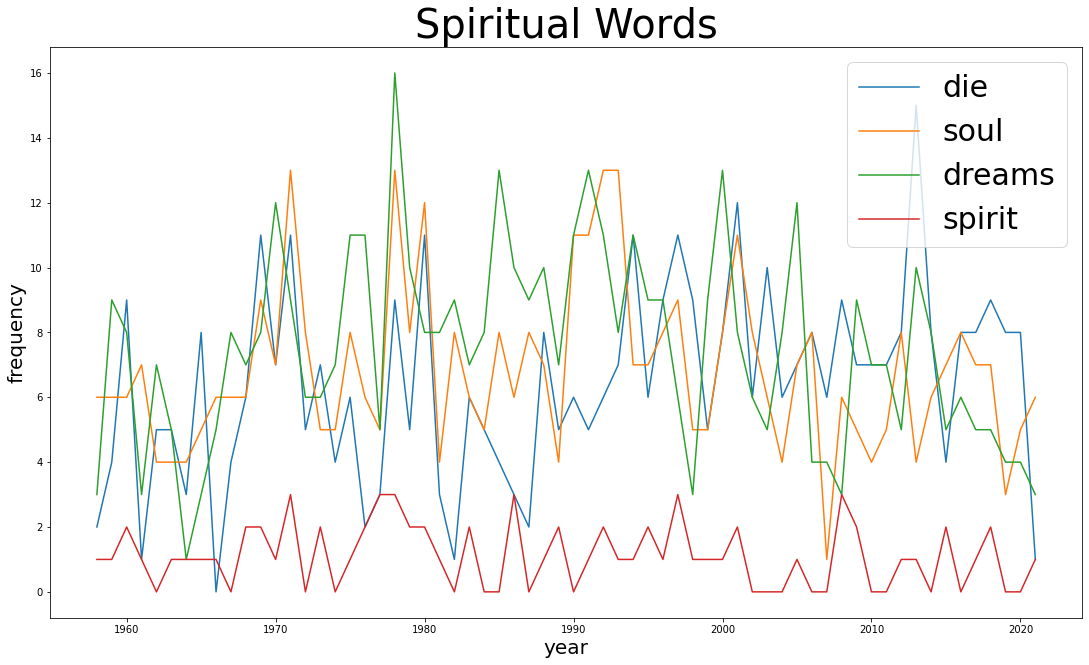

In [15]:
quick_look_up(lyrics_df, ['die', 'soul', 'dreams', 'spirit'], 'Spiritual Words');

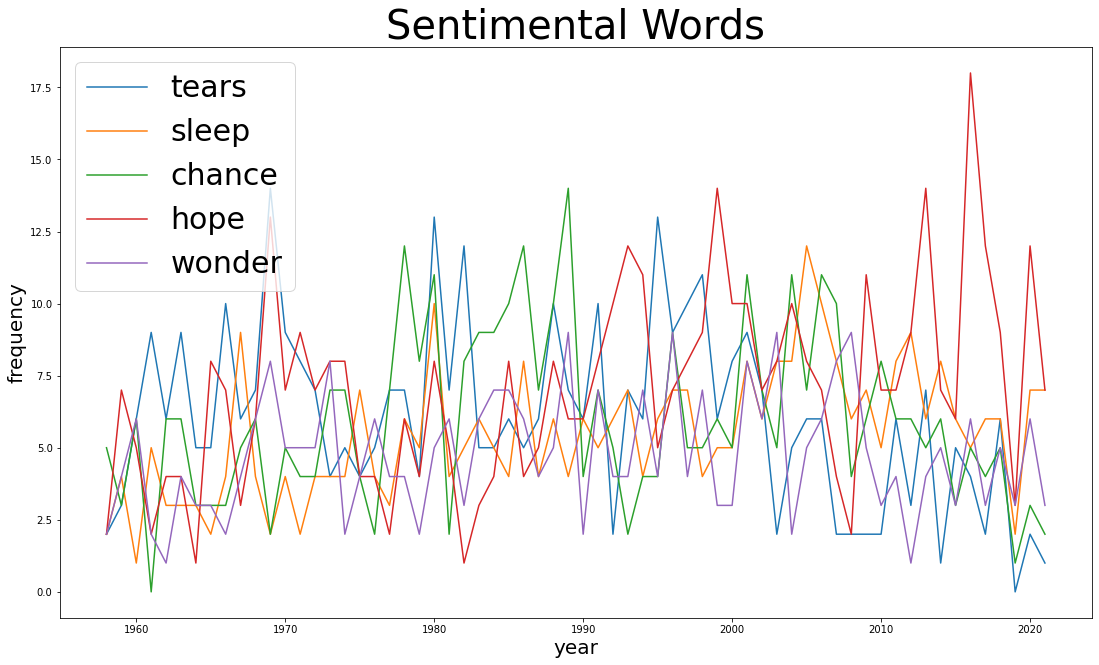

In [16]:
quick_look_up(lyrics_df, ['tears', 'sleep', 'chance', 'hope', 'wonder'], 'Sentimental Words');

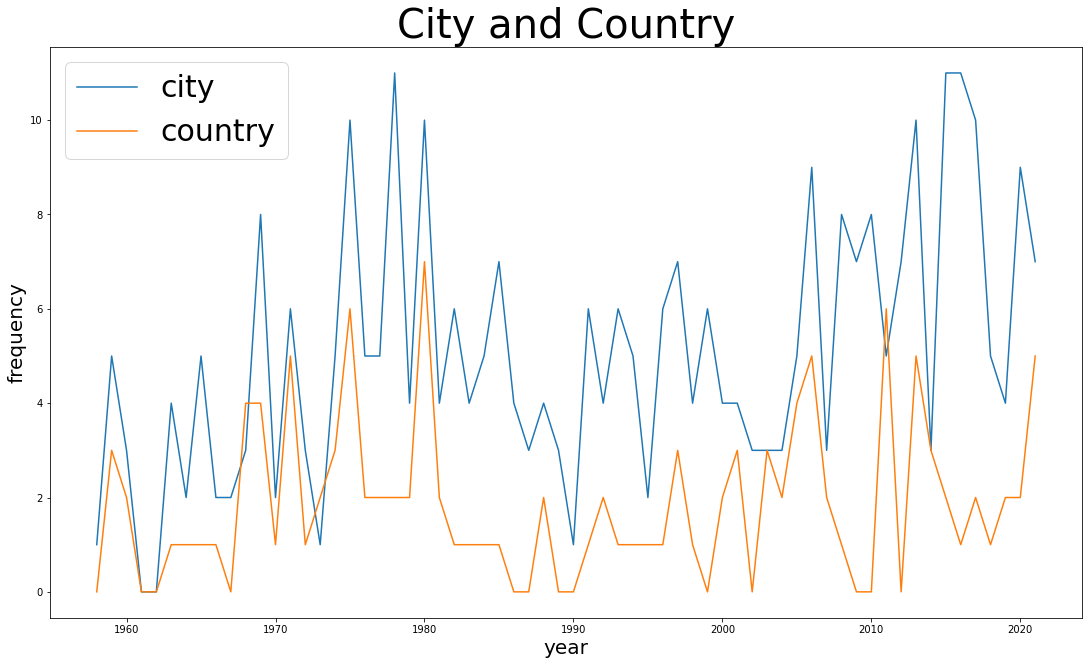

In [17]:
quick_look_up(lyrics_df, ['city', 'country'], 'City and Country');

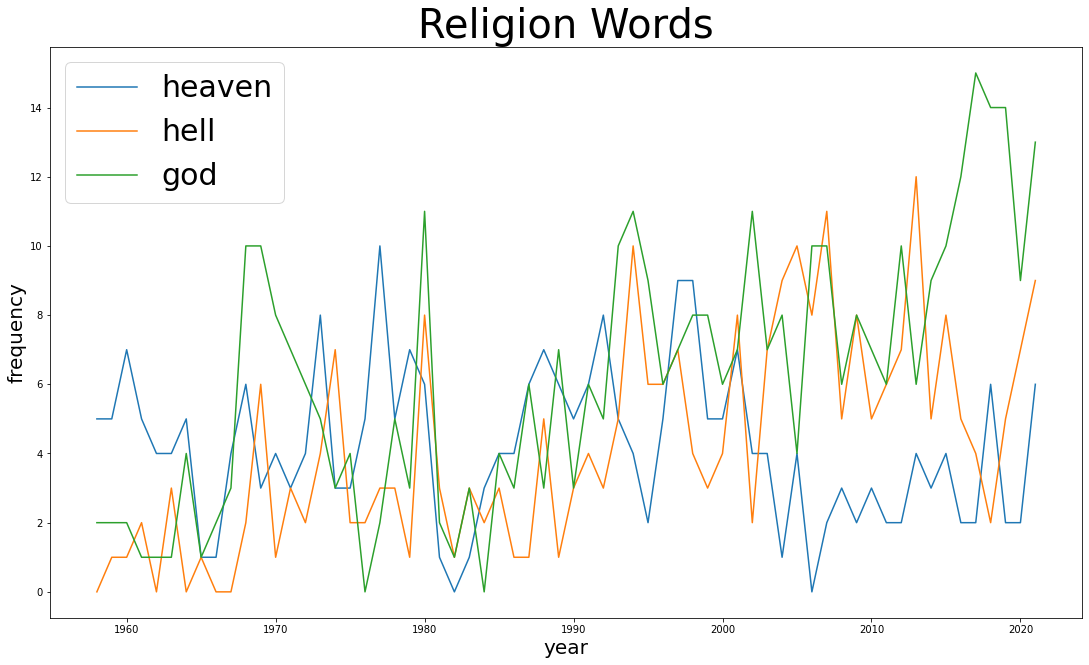

In [18]:
quick_look_up(lyrics_df, ['heaven', 'hell', 'god'], 'Religion Words');

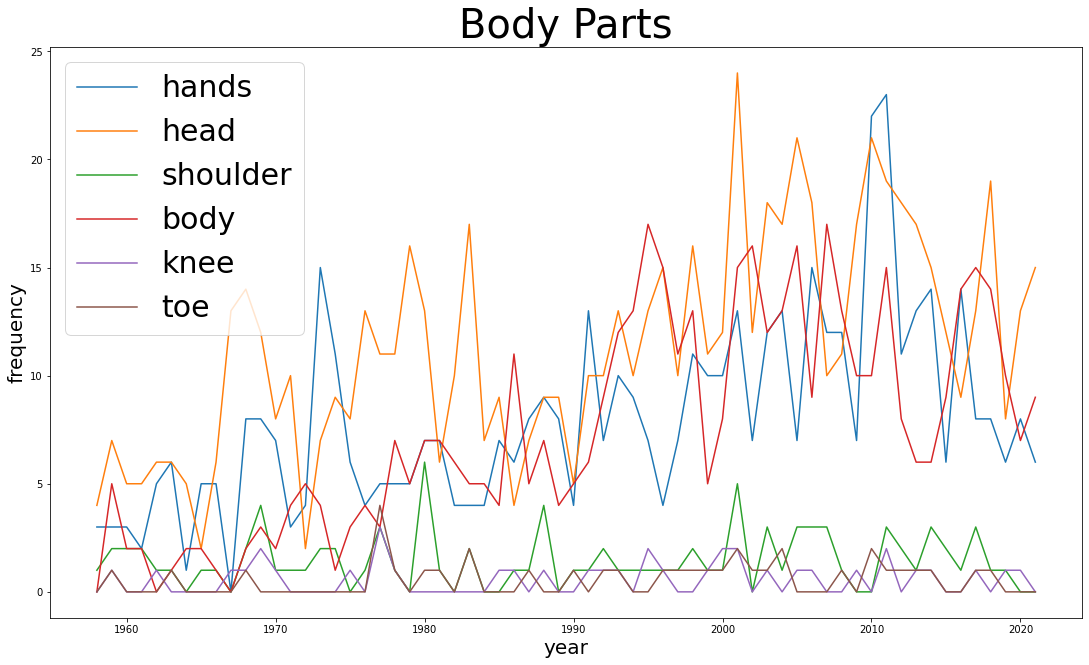

In [19]:
quick_look_up(lyrics_df, ['hands', 'head', 'shoulder', 'body', 'knee', 'toe'], 'Body Parts');

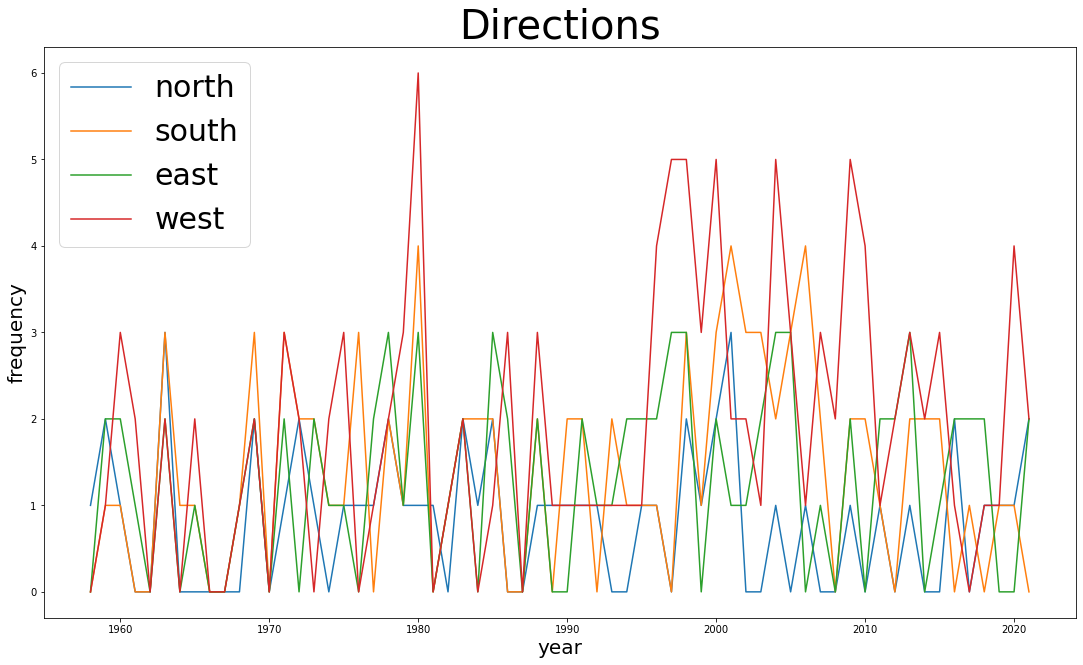

In [20]:
quick_look_up(lyrics_df, ['north', 'south', 'east', 'west'], 'Directions');

# Takeaway

- Lyrics data can be difficult to work with. Although we have the (almost) complete dataset of Billboard top 100 lyrics, the word frequencies are still not large enough for analyses in most cases.
- Lyrics also often contain repeats, colloquial terms, and non-standard grammar, making it hard to use formal NLP methods such as topic modeling to analyze.
- Even with basic word counts, we still have to be very selective about which words to use. Artists who end up in the top 100 list probably spend a lot of time crafting their lyrics, and an interpretation of the lyrics data will need to take this into consideration.